In [241]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

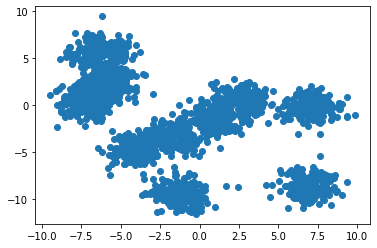

In [242]:
# X, y = make_blobs(n_samples=1000, centers=20, cluster_std=0.5, random_state=10)
X, y = make_blobs(n_samples=2000, centers=10, cluster_std=0.90, random_state=2)
# X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])

In [243]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

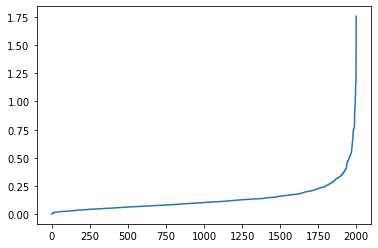

In [244]:
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [245]:
X

array([[-7.2979214 ,  0.57527412],
       [ 6.22000909, -0.59871643],
       [-4.59858173, -5.44464683],
       ...,
       [ 2.90598551,  1.61238252],
       [ 1.70381986, -1.36622531],
       [-7.58797884, -0.33297648]])

In [246]:
distances

array([0.00372304, 0.00372304, 0.0046598 , ..., 1.17224633, 1.18254586,
       1.75510711])

In [247]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

1988
0.790608196446263
***


In [248]:
m = DBSCAN(eps=eps, min_samples=10)
m.fit(X)

DBSCAN(eps=0.790608196446263, min_samples=10)

In [249]:
clusters = m.labels_
clusters

array([0, 1, 1, ..., 1, 1, 0])

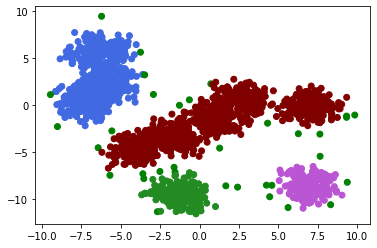

In [250]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [251]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value


,0,1,cluster
0,-7.297921,0.575274,0
1,6.220009,-0.598716,1
2,-4.598582,-5.444647,1
3,2.700489,-1.859723,1
4,-2.960512,-5.507708,1
...,...,...,...
1995,-1.868289,-8.213525,2
1996,-7.697846,0.093832,0
1997,2.905986,1.612383,1
1998,1.703820,-1.366225,1


In [252]:
def calculate_member_core_point(cluster_values, cluster_number):
    core_point_arrays = cluster_values.groupby('cluster').get_group(cluster_number).drop('cluster', axis=1).to_numpy()
    core_points = dict()
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        core_points[point] = pi
    return core_points

# dens_value = dict(sorted(calculate_member_core_point(cluster_value, 0).items(), reverse=True))
# dens_value

In [253]:
def find_center_point(point1, point2):
    n = len(point1)
    result = [0 for i in range(n)]
    for i in range(n):
        result[i] = (point1[i] + point2[i]) / 2
    return [result[i] for i, v in enumerate(result)]

In [254]:
find_center_point([5, 3, 4], [2, 7, 6])

[3.5, 5.0, 5.0]

In [255]:
def compress_data(dens_values):
    final_point = []
    not_check = []
    iterate = 0
    middlePoint = []
    for kpi, pi in dens_values.items():
        middlePoint = pi
        dens = 0
        continues = 0
        for key, check in enumerate(not_check):
            if (pi == check).all():
                continues = 1
                break
        if continues == 1:
            continue
        for kpj, pj in dens_values.items():
            if (dist(middlePoint, pj) < eps and dist(middlePoint, pj) != 0):
                middlePoint = find_center_point(middlePoint, pj)
                not_check.append(pj)
                dens += 1
        print(dens)
        middlePoint = np.append(middlePoint, dens)
        final_point.append(np.ndarray.tolist(np.array(middlePoint)))
    return final_point

In [256]:
all_data = []
for i in range(m.labels_.max() + 1):
    dens_value = dict(sorted(calculate_member_core_point(cluster_value, i).items(), reverse=True))
    all_data.append(compress_data(dens_value))

result = []
for i, vi in enumerate(all_data):
    for j, vj in enumerate(vi):
        result.append(vj)

result

9
11
12
3
5
6
12
12
6
6
7
4
1
3
3
6
2
0
0
2
0
2
1
1
3
0
1
0
0
10
9
4
10
3
10
8
5
7
3
4
5
5
9
5
3
0
2
5
2
1
3
2
3
2
5
1
2
4
1
2
0
1
0
2
0
0
0
0
0
0
0
19
20
20
20
20
20
20
20
20
20
10
20
16
20
11
13
10
10
7
9
7
5
5
5
4
5
2
2
23
24
23
23
23
23
23
20
20
19
19
23
7
14
23
9
17
6
4
11
5
5
7
2
1
2


[[-5.9145594190364275, 0.9524997536375784, 9.0],
 [-6.347959313224747, -0.2920222194493407, 11.0],
 [-6.347871394541081, -0.2918541431984889, 12.0],
 [-6.422808457231641, 5.8294257065594035, 3.0],
 [-6.010372777349165, 0.4055961308403666, 5.0],
 [-5.3891662089108525, 2.8152621778937608, 6.0],
 [-6.348069422912166, -0.2919167426445207, 12.0],
 [-6.3480373647881745, -0.2919124469710997, 12.0],
 [-7.264862742933625, -0.20921535940873323, 6.0],
 [-7.7299579497665665, 1.0415419114901003, 6.0],
 [-7.200918512719506, 4.196550655443756, 7.0],
 [-5.722178795583048, 4.423084346062656, 4.0],
 [-7.137182838063811, 2.9030593971708116, 1.0],
 [-4.876383812050081, 1.5693061520290306, 3.0],
 [-6.318690515073122, 6.7032888357466565, 3.0],
 [-8.164748043021069, 0.9011537770492433, 6.0],
 [-7.99500460655969, 5.850511002347893, 2.0],
 [-7.171243237285192, -1.1538164205410733, 0.0],
 [-7.946280251094123, 2.00793331271112, 0.0],
 [-6.970786942279437, 6.773947132813879, 2.0],
 [-4.479024011356163, 3.35146873

In [257]:
arrays_dens = np.array(result)
arrays_dens

array([[ -5.91455942,   0.95249975,   9.        ],
       [ -6.34795931,  -0.29202222,  11.        ],
       [ -6.34787139,  -0.29185414,  12.        ],
       [ -6.42280846,   5.82942571,   3.        ],
       [ -6.01037278,   0.40559613,   5.        ],
       [ -5.38916621,   2.81526218,   6.        ],
       [ -6.34806942,  -0.29191674,  12.        ],
       [ -6.34803736,  -0.29191245,  12.        ],
       [ -7.26486274,  -0.20921536,   6.        ],
       [ -7.72995795,   1.04154191,   6.        ],
       [ -7.20091851,   4.19655066,   7.        ],
       [ -5.7221788 ,   4.42308435,   4.        ],
       [ -7.13718284,   2.9030594 ,   1.        ],
       [ -4.87638381,   1.56930615,   3.        ],
       [ -6.31869052,   6.70328884,   3.        ],
       [ -8.16474804,   0.90115378,   6.        ],
       [ -7.99500461,   5.850511  ,   2.        ],
       [ -7.17124324,  -1.15381642,   0.        ],
       [ -7.94628025,   2.00793331,   0.        ],
       [ -6.97078694,   6.77394

In [258]:
new_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] >= 3)]
new_dens

array([[ -5.91455942,   0.95249975,   9.        ],
       [ -6.34795931,  -0.29202222,  11.        ],
       [ -6.34787139,  -0.29185414,  12.        ],
       [ -6.42280846,   5.82942571,   3.        ],
       [ -6.01037278,   0.40559613,   5.        ],
       [ -5.38916621,   2.81526218,   6.        ],
       [ -6.34806942,  -0.29191674,  12.        ],
       [ -6.34803736,  -0.29191245,  12.        ],
       [ -7.26486274,  -0.20921536,   6.        ],
       [ -7.72995795,   1.04154191,   6.        ],
       [ -7.20091851,   4.19655066,   7.        ],
       [ -5.7221788 ,   4.42308435,   4.        ],
       [ -4.87638381,   1.56930615,   3.        ],
       [ -6.31869052,   6.70328884,   3.        ],
       [ -8.16474804,   0.90115378,   6.        ],
       [ -4.18574121,   1.17696902,   3.        ],
       [ -3.20326203,  -4.56465338,  10.        ],
       [ -2.11872444,  -3.8023133 ,   9.        ],
       [  0.76336175,  -0.47292632,   4.        ],
       [ -2.11823844,  -3.80188

In [259]:
zero_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] < 3)]
zero_dens

array([[ -7.13718284,   2.9030594 ,   1.        ],
       [ -7.99500461,   5.850511  ,   2.        ],
       [ -7.17124324,  -1.15381642,   0.        ],
       [ -7.94628025,   2.00793331,   0.        ],
       [ -6.97078694,   6.77394713,   2.        ],
       [ -4.47902401,   3.35146874,   0.        ],
       [ -8.034517  ,   4.97622494,   2.        ],
       [ -5.11454554,   0.27529839,   1.        ],
       [ -7.54954627,   7.64539033,   1.        ],
       [ -4.13851902,   5.33801435,   0.        ],
       [ -4.80680865,   7.39701331,   1.        ],
       [ -8.74193504,   1.96550622,   0.        ],
       [ -4.01928395,   6.41323282,   0.        ],
       [  6.08054267,   0.091155  ,   0.        ],
       [  7.5800966 ,   0.88653084,   2.        ],
       [ -2.86767769,  -3.14059226,   2.        ],
       [  2.92779548,   1.96776889,   1.        ],
       [  8.12395757,   0.06852397,   2.        ],
       [ -0.27598628,  -1.70371561,   2.        ],
       [ -1.96842463,  -4.91952

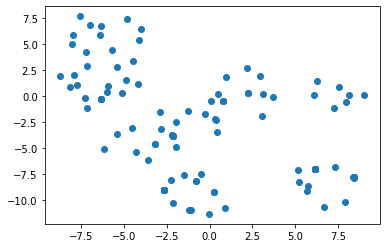

In [260]:
plt.scatter(arrays_dens[:, 0], arrays_dens[:, 1])

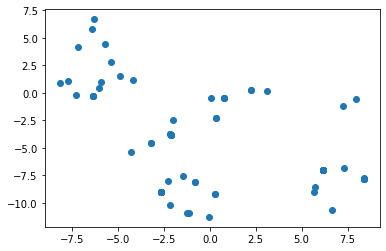

In [261]:
plt.scatter(new_dens[:, 0], new_dens[:, 1])

In [262]:
zero_dens_point = zero_dens[:, 0:len(zero_dens[0, :]) - 1]
zero_dens_point

array([[ -7.13718284,   2.9030594 ],
       [ -7.99500461,   5.850511  ],
       [ -7.17124324,  -1.15381642],
       [ -7.94628025,   2.00793331],
       [ -6.97078694,   6.77394713],
       [ -4.47902401,   3.35146874],
       [ -8.034517  ,   4.97622494],
       [ -5.11454554,   0.27529839],
       [ -7.54954627,   7.64539033],
       [ -4.13851902,   5.33801435],
       [ -4.80680865,   7.39701331],
       [ -8.74193504,   1.96550622],
       [ -4.01928395,   6.41323282],
       [  6.08054267,   0.091155  ],
       [  7.5800966 ,   0.88653084],
       [ -2.86767769,  -3.14059226],
       [  2.92779548,   1.96776889],
       [  8.12395757,   0.06852397],
       [ -0.27598628,  -1.70371561],
       [ -1.96842463,  -4.91952749],
       [  3.6998361 ,  -0.13082808],
       [ -3.59610243,  -6.10368959],
       [  0.51108047,   0.15216269],
       [  0.40896491,  -3.47898026],
       [  6.24098539,   1.41894569],
       [ -1.26728809,  -1.42974551],
       [  3.05203797,  -1.91970617],
 

In [263]:
delete_values = []
for key, value in enumerate(X):
    for zkey, zval in enumerate(zero_dens_point):
        if dist(zval, value) < eps:
            delete_values.append(value)

remain_values = []
for key, value in enumerate(X):
    length = 0
    for dkey, dval in enumerate(delete_values):
        if (dval != value).all():
            length += 1
    if length == len(delete_values):
        remain_values.append(value)
remain_values = np.array(remain_values)
remain_values

array([[-7.2979214 ,  0.57527412],
       [-4.59858173, -5.44464683],
       [-2.96051216, -5.50770792],
       ...,
       [-7.69784559,  0.0938318 ],
       [ 1.70381986, -1.36622531],
       [-7.58797884, -0.33297648]])

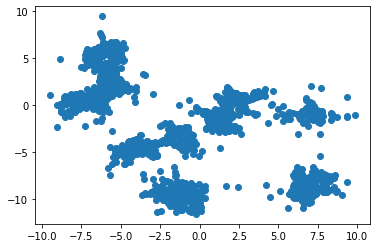

In [264]:
plt.scatter(remain_values[:, 0], remain_values[:, 1])

In [265]:
# neigh = NearestNeighbors(n_neighbors=5)
# nbrs = neigh.fit(remain_values)
# distances, indices = nbrs.kneighbors(remain_values)
# distances = np.sort(distances, axis=0)
# distances = distances[:, 1]
# plt.plot(distances)

In [266]:
# diff = np.array([])
# for key, value in enumerate(distances):
#     if key != len(distances) - 1:
#         diff = np.append(diff, abs(value - distances[key + 1]))
#
# diffStd = diff.std()
#
# for key, value in enumerate(diff):
#     if value > 4 * diffStd:
#         print(key)
#         print(distances[key])
#         eps = distances[key]
#         print("***")
#         break

In [267]:
m = DBSCAN(eps=eps, min_samples=10)
m.fit(remain_values)

DBSCAN(eps=0.790608196446263, min_samples=10)

In [268]:
final_db_cluster = m.labels_
final_db_cluster

array([0, 1, 1, ..., 0, 2, 0])

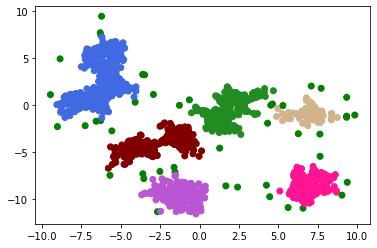

In [269]:
plt.scatter(remain_values[:, 0], remain_values[:, 1], c=vectorizer(final_db_cluster))

In [270]:
dens_cluster_value = pd.concat([pd.DataFrame(remain_values), pd.DataFrame(final_db_cluster, columns=['cluster'])],
                               axis=1)
dens_cluster_value

,0,1,cluster
0,-7.297921,0.575274,0
1,-4.598582,-5.444647,1
2,-2.960512,-5.507708,1
3,-6.219933,1.816893,0
4,1.797165,-0.137430,2
...,...,...,...
1437,-0.913899,-3.360971,1
1438,-1.868289,-8.213525,3
1439,-7.697846,0.093832,0
1440,1.703820,-1.366225,2


In [271]:
def find_center_point_cluster(cluster_values, cluster_number):
    center_points = []
    for i in range(cluster_number):
        mid_point = []
        denses = cluster_values.groupby('cluster').get_group(i).drop('cluster', axis=1).to_numpy()
        for key, value in enumerate(denses):
            if key == 0:
                mid_point = value
            if (key != len(denses)):
                mid_point = find_center_point(mid_point, value)
        center_points.append(mid_point)
    return center_points

center_point =find_center_point_cluster(dens_cluster_value, max(final_db_cluster) + 1)

In [272]:
center_point = np.array(center_point)
center_point

array([[-7.23409963,  0.17312212],
       [-1.32341975, -3.40155975],
       [ 1.65560181, -0.89107446],
       [-1.56713501, -8.80301061],
       [ 7.16332342, -0.8737783 ],
       [ 6.8343617 , -8.05073752]])

In [273]:
kmeans = KMeans(n_clusters=len(center_point), init=center_point, n_init=1)
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([0, 4, 1, ..., 2, 2, 0], dtype=int32)

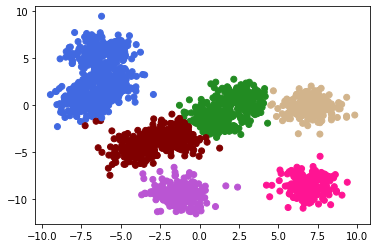

In [274]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))